In [3]:
#importing packages

import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"C:\Users\Ezhil\OneDrive\Desktop\python pro\Copper_Set.xlsx - Result 1.csv")
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


cleaning_dataset


In [5]:

#checking dtype

df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [6]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date

In [7]:
df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery date'] = pd.to_datetime(df['delivery date'])

In [8]:
df['delivery_time_taken']=(df['item_date']-df['delivery date']).abs().dt.days
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time_taken
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,91.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0,0.0


In [9]:
for i in df.columns:
  print(i,":",df[i].nunique())

id : 181671
item_date : 250
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 26
selling_price : 9795
delivery_time_taken : 229


In [10]:
df['quantity tons'].value_counts()["e"]

1

In [11]:
df['quantity tons']=df['quantity tons'].replace("e",np.nan)

In [12]:
df['quantity tons'] = df['quantity tons'][~df['quantity tons'].isna()].astype(float)

In [13]:
df.dtypes

id                             object
item_date              datetime64[ns]
quantity tons                 float64
customer                      float64
country                       float64
status                         object
item type                      object
application                   float64
thickness                     float64
width                         float64
material_ref                   object
product_ref                     int64
delivery date          datetime64[ns]
selling_price                 float64
delivery_time_taken           float64
dtype: object

In [14]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time_taken
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,91.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.0,0.0


Missing values

In [15]:
df.isna().sum()

id                         2
item_date                  3
quantity tons              1
customer                   1
country                   28
status                     2
item type                  0
application               24
thickness                  1
width                      0
material_ref           77919
product_ref                0
delivery date              3
selling_price              1
delivery_time_taken        6
dtype: int64

In [16]:
# deleting the remaining null values as they are less than 1% of data which can be neglected
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)

In [16]:

df.isna().sum()

id                         2
item_date                  3
quantity tons              1
customer                   1
country                   28
status                     2
item type                  0
application               24
thickness                  1
width                      0
material_ref           77919
product_ref                0
delivery date              3
selling_price              1
delivery_time_taken        6
dtype: int64

In [17]:
mask1 = df['selling_price'] <= 0
print(mask1.sum())
df.loc[mask1, 'selling_price'] = np.nan

mask1 = df['quantity tons'] <= 0
print(mask1.sum())
df.loc[mask1, 'quantity tons'] = np.nan

mask1 = df['thickness'] <= 0
print(mask1.sum())
df.loc[mask1, 'thickness'] = np.nan

mask1 = df['customer'] <= 0
print(mask1.sum())
df.loc[mask1, 'customer'] = np.nan

7
4
0
0


In [18]:
df.drop(columns=['id','material_ref','item_date','delivery date'], inplace=True)
df = df.dropna()
len(df)

181622

In [19]:

df.isna().sum()

quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
product_ref            0
selling_price          0
delivery_time_taken    0
dtype: int64

In [20]:

df.shape


(181622, 11)

checking duplicates

In [21]:

df=df.drop_duplicates()
df.shape

(181622, 11)

In [22]:

cat_col=cat_col = df.select_dtypes(include=['object','datetime64[ns]']).columns
cat_col

Index(['status', 'item type'], dtype='object')

In [23]:
cont_col=cat_col = df.select_dtypes(exclude=['object','datetime64[ns]']).columns
cont_col

Index(['quantity tons', 'customer', 'country', 'application', 'thickness',
       'width', 'product_ref', 'selling_price', 'delivery_time_taken'],
      dtype='object')

checking skewness and outliers

In [24]:

for column in cont_col:
  print(f"Column : {column}")
  skewness = skew(df[column])
  print("Skewness:", skewness)

  print("*******************")

Column : quantity tons
Skewness: 424.62769478146345
*******************
Column : customer
Skewness: -149.08639919503787
*******************
Column : country
Skewness: 0.7535275847294174
*******************
Column : application
Skewness: 0.7243722680078267
*******************
Column : thickness
Skewness: 15.302832491963118
*******************
Column : width
Skewness: 0.3748219888993155
*******************
Column : product_ref
Skewness: 1.015052190092366
*******************
Column : selling_price
Skewness: 301.3432925448491
*******************
Column : delivery_time_taken
Skewness: 0.46965545333511743
*******************


In [25]:
for column in cont_col:

    print(f"Column : {column}")
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5 * iqr)
    print(f"UpperThreshold : {upper_threshold} and lowerThreshold : {lower_threshold}")

    print(df[column].describe())
    print('**********************')

Column : quantity tons
UpperThreshold : 151.45201451124998 and lowerThreshold : -73.32115391874999
count    1.816220e+05
mean     5.876532e+03
std      2.349405e+06
min      1.000000e-05
25%      1.096878e+01
50%      3.036402e+01
75%      6.716208e+01
max      1.000000e+09
Name: quantity tons, dtype: float64
**********************
Column : customer
UpperThreshold : 30405714.0 and lowerThreshold : 30071586.0
count    1.816220e+05
mean     3.023251e+07
std      1.005646e+05
min      1.245800e+04
25%      3.019688e+07
50%      3.020524e+07
75%      3.028042e+07
max      3.040818e+07
Name: customer, dtype: float64
**********************
Column : country
UpperThreshold : 156.0 and lowerThreshold : -52.0
count    181622.000000
mean         44.893818
std          24.404481
min          25.000000
25%          26.000000
50%          30.000000
75%          78.000000
max         113.000000
Name: country, dtype: float64
**********************
Column : application
UpperThreshold : 87.5 and lowerTh

In [26]:
def plot(df,column):
  #boxplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.boxplot(x=df[column], color='skyblue')
  plt.xlabel(column)
  plt.title("Box Plot of "+" "+column)

  #distplot

  plt.subplot(1,3,2)
  sns.distplot(df[column],kde=True,color='blue')
  plt.xlabel(column)
  plt.ylabel("count")
  plt.title("Distplot for"+" "+column)
  
  #violinplot

  plt.subplot(1,3,3)
  sns.violinplot(data=df, x=column)
  plt.title("violin plot for"+" "+column)

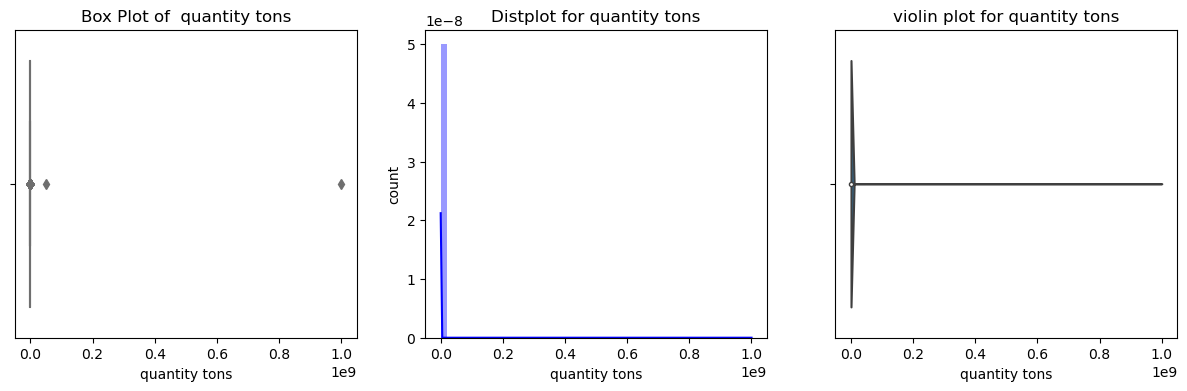

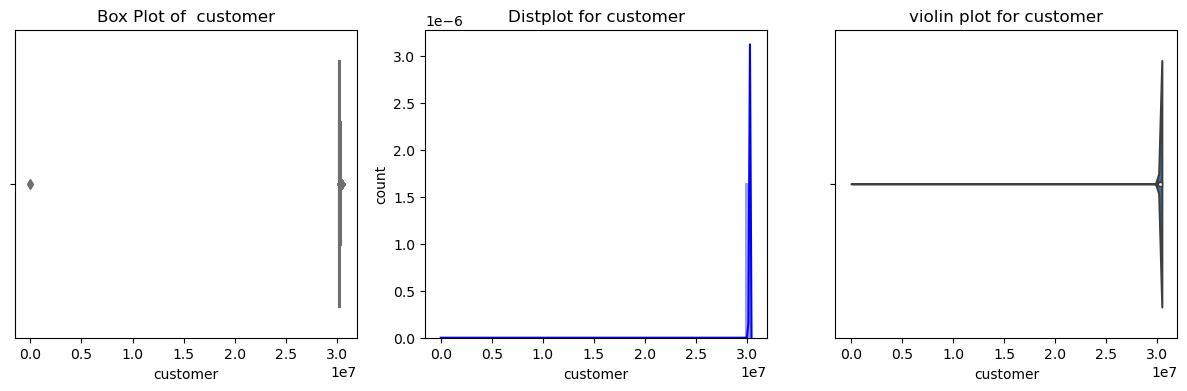

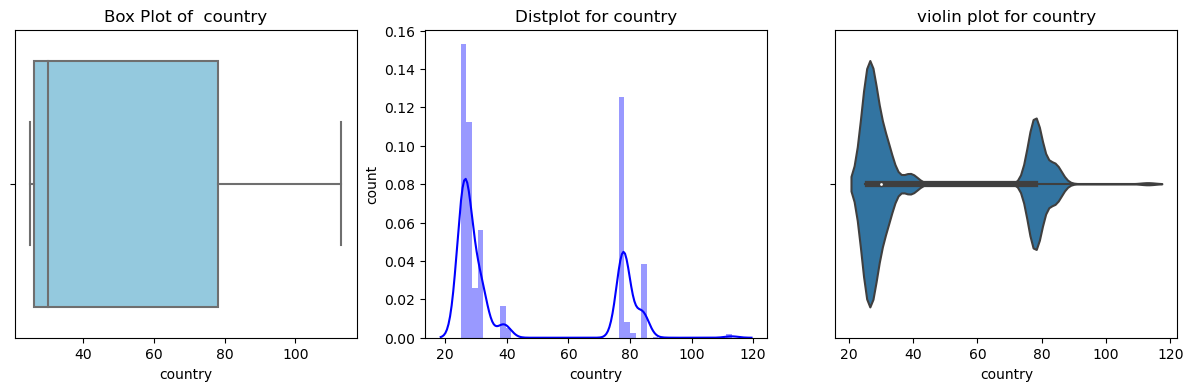

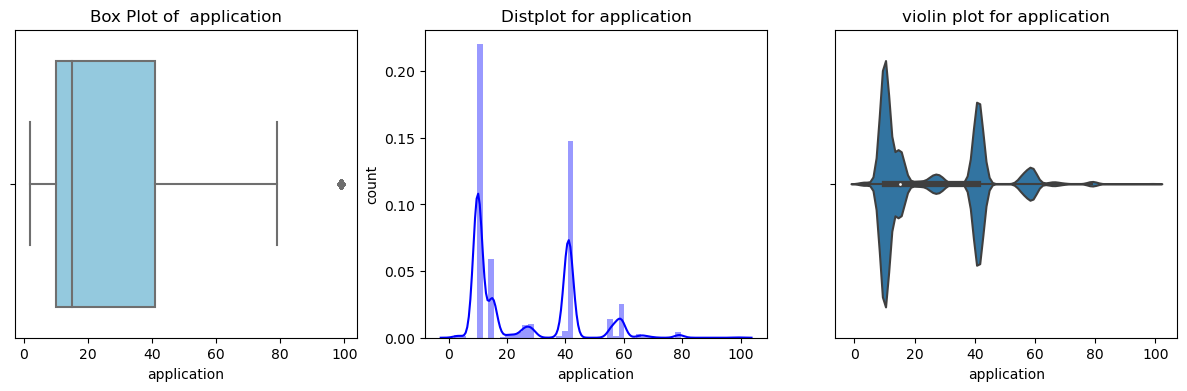

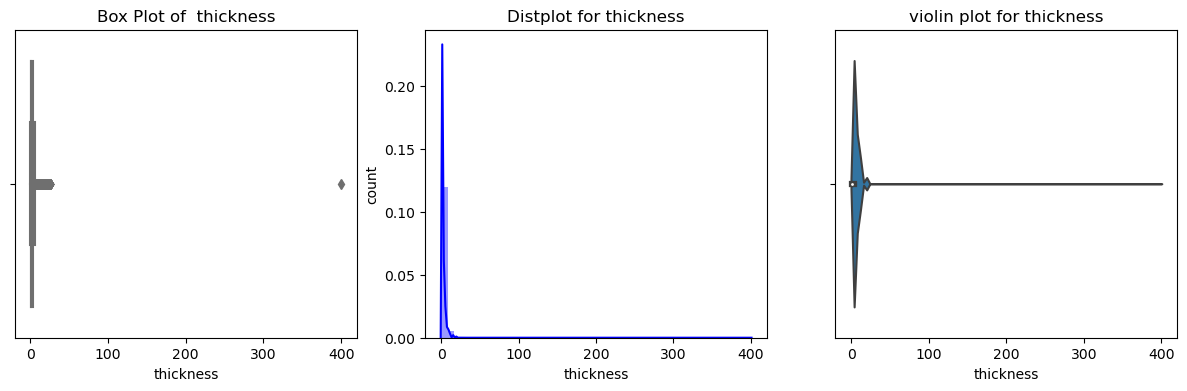

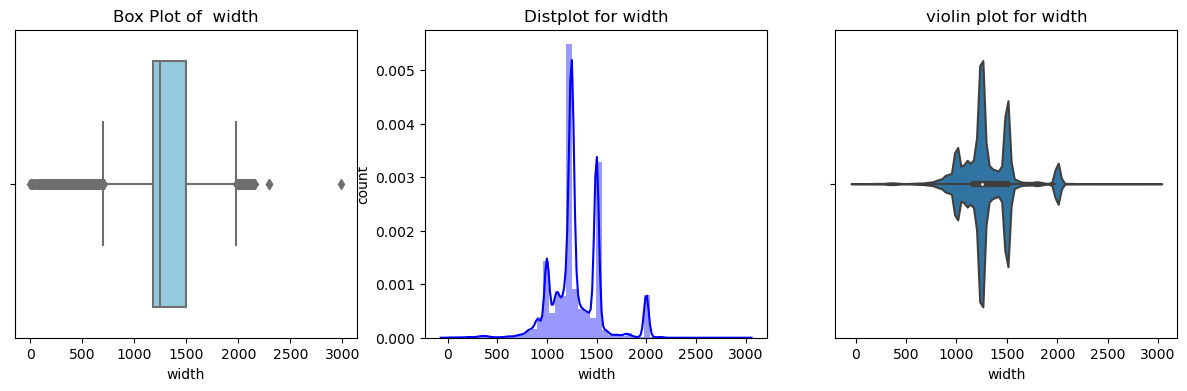

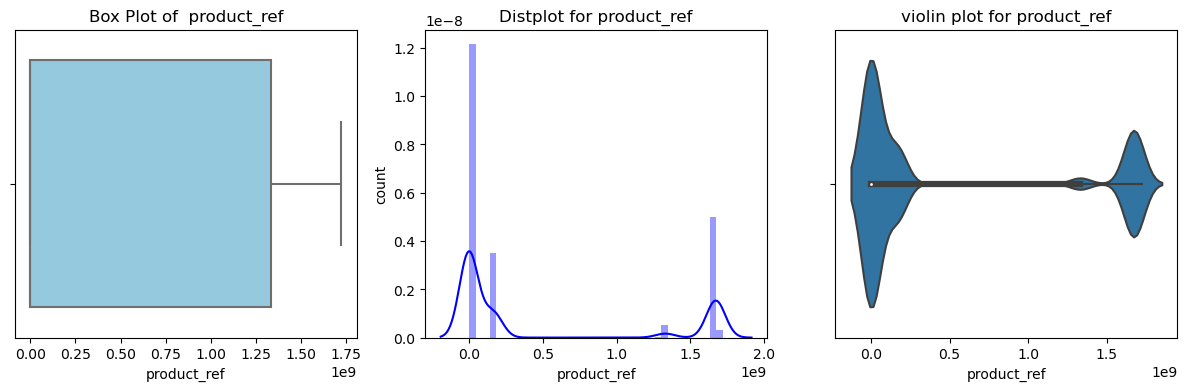

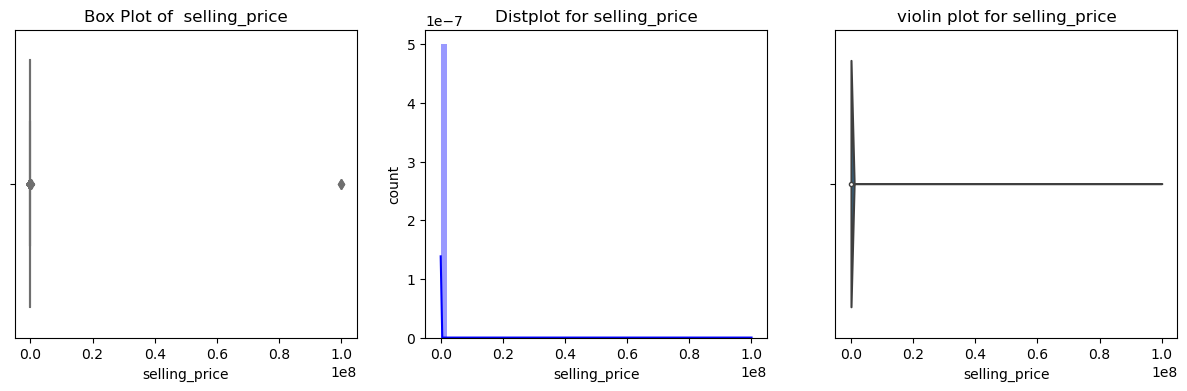

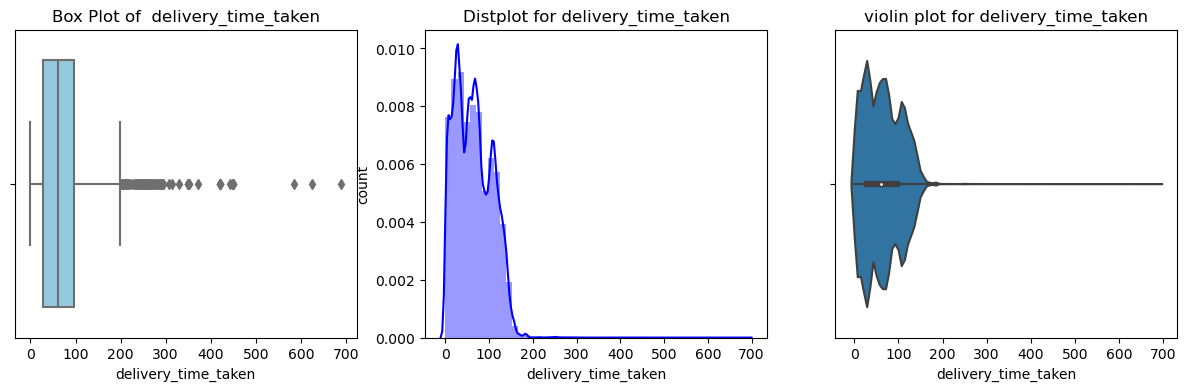

In [27]:
for i in cont_col:
  plot(df,i)

Removing Outliers

In [28]:
for column in cont_col:

    print(f"Column : {column}")
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5 * iqr)
    print(f"UpperThreshold : {upper_threshold} and lowerThreshold : {lower_threshold}")
    df[column] = df[column].clip(lower_threshold, upper_threshold)

    print(df[column].describe())
    print('**********************')

Column : quantity tons
UpperThreshold : 151.45201451124998 and lowerThreshold : -73.32115391874999
count    181622.000000
mean         49.176695
std          47.996692
min           0.000010
25%          10.968784
50%          30.364016
75%          67.162076
max         151.452015
Name: quantity tons, dtype: float64
**********************
Column : customer
UpperThreshold : 30405714.0 and lowerThreshold : 30071586.0
count    1.816220e+05
mean     3.023266e+07
std      7.128576e+04
min      3.007159e+07
25%      3.019688e+07
50%      3.020524e+07
75%      3.028042e+07
max      3.040571e+07
Name: customer, dtype: float64
**********************
Column : country
UpperThreshold : 156.0 and lowerThreshold : -52.0
count    181622.000000
mean         44.893818
std          24.404481
min          25.000000
25%          26.000000
50%          30.000000
75%          78.000000
max         113.000000
Name: country, dtype: float64
**********************
Column : application
UpperThreshold : 87.5 and

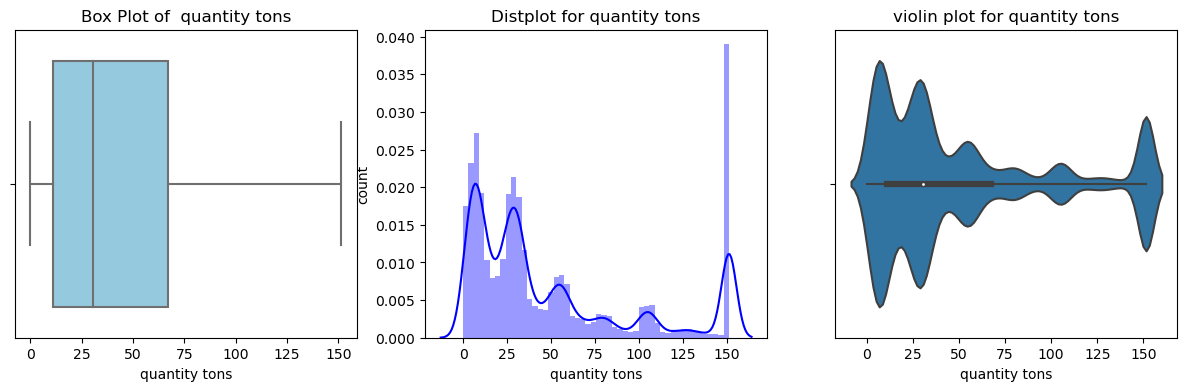

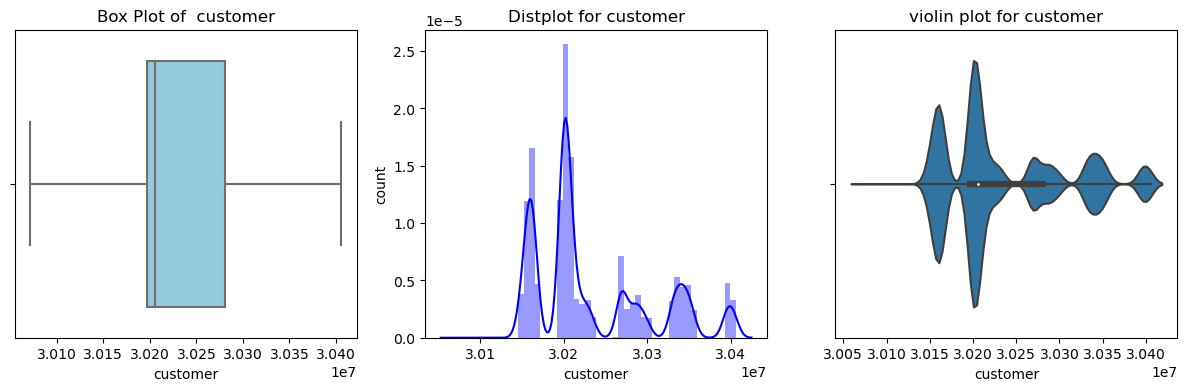

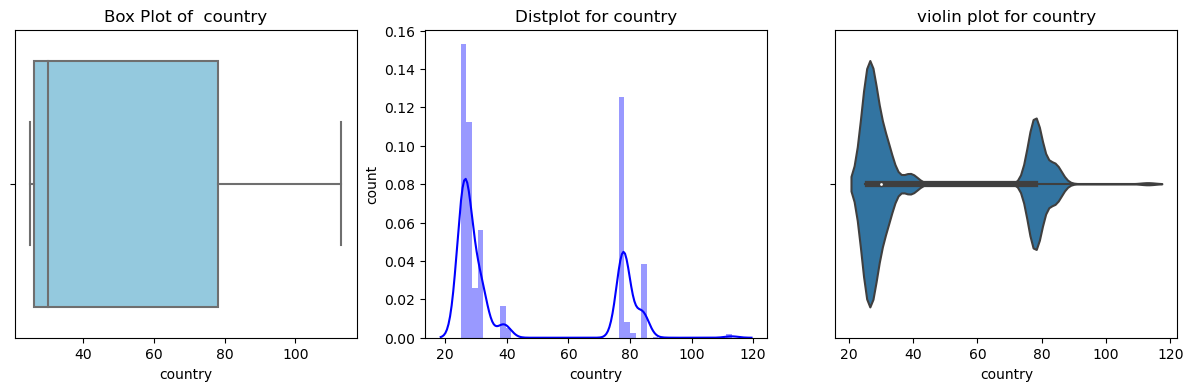

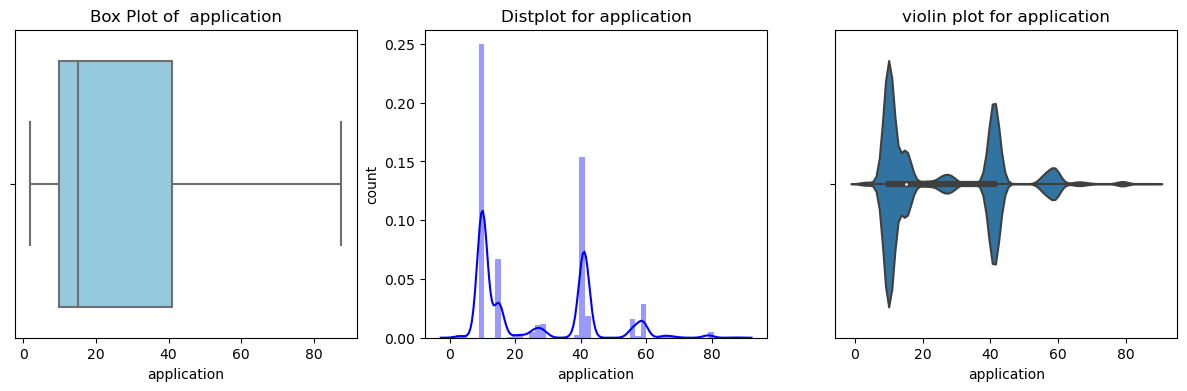

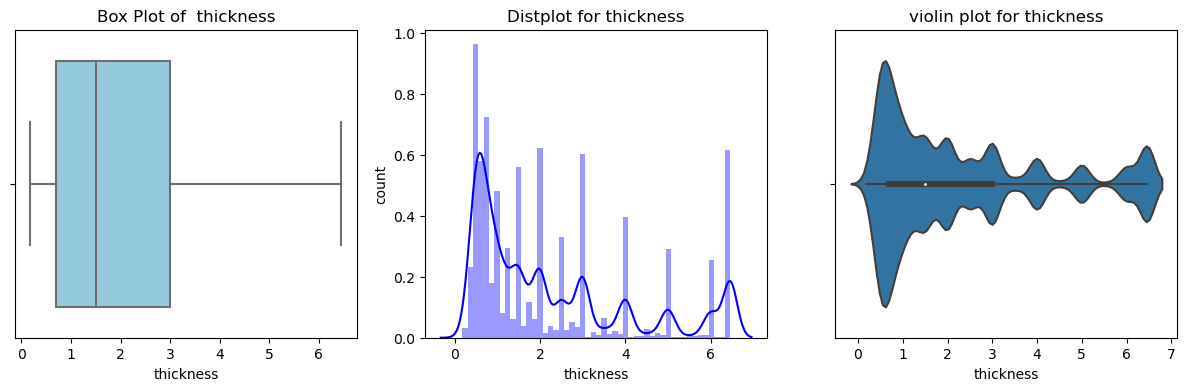

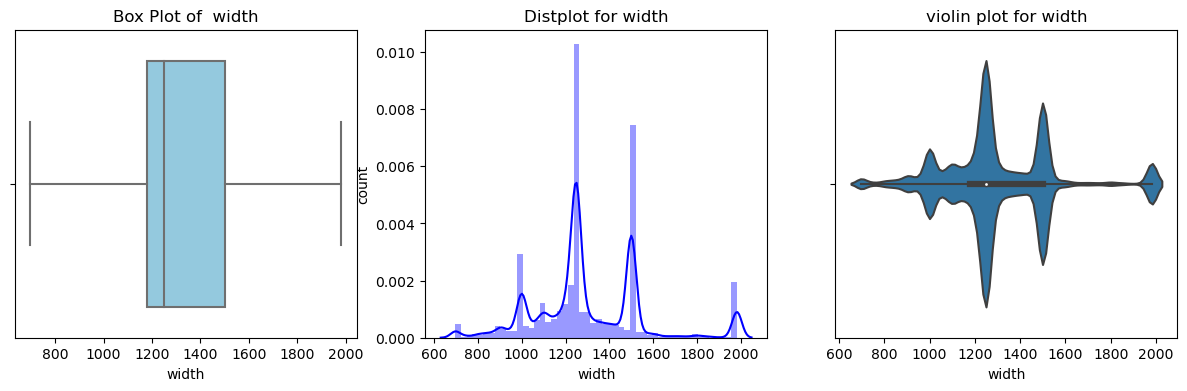

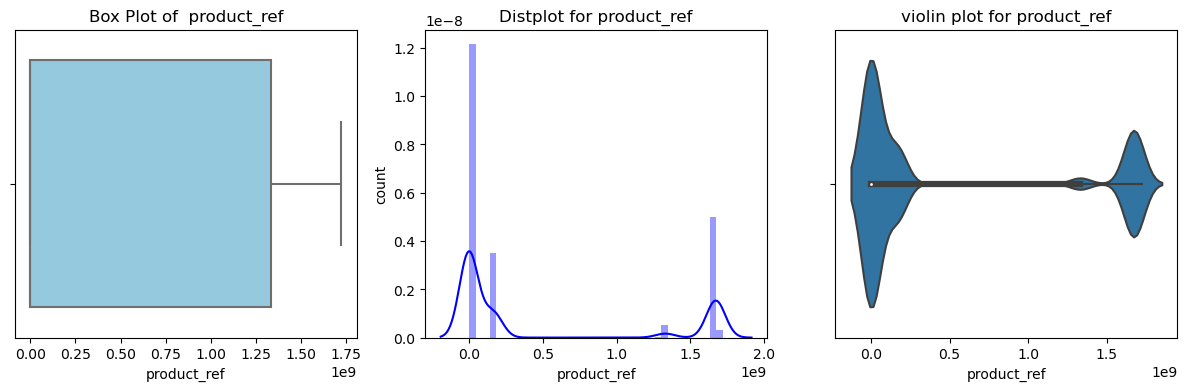

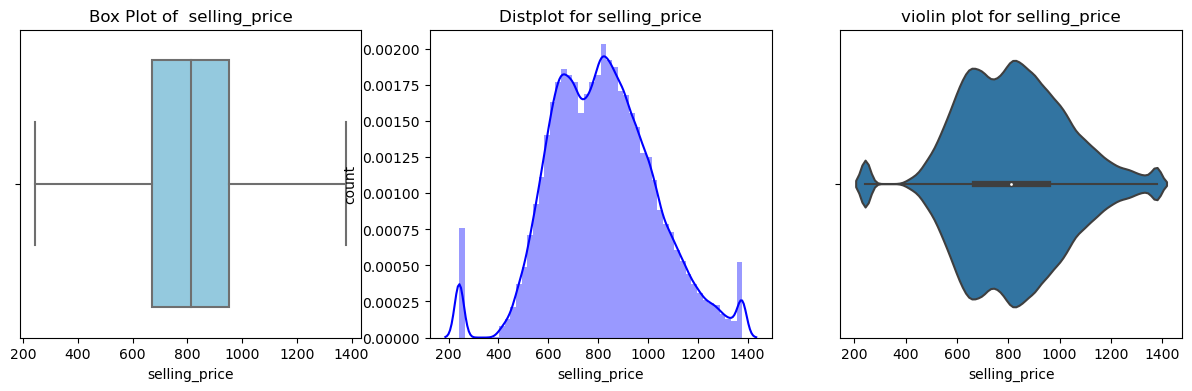

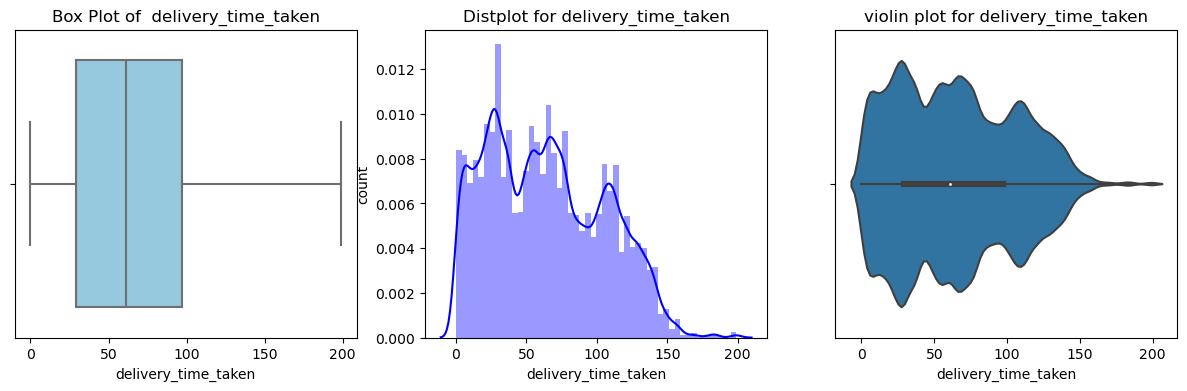

In [29]:
for i in cont_col:
  plot(df,i)

EDA

<Axes: >

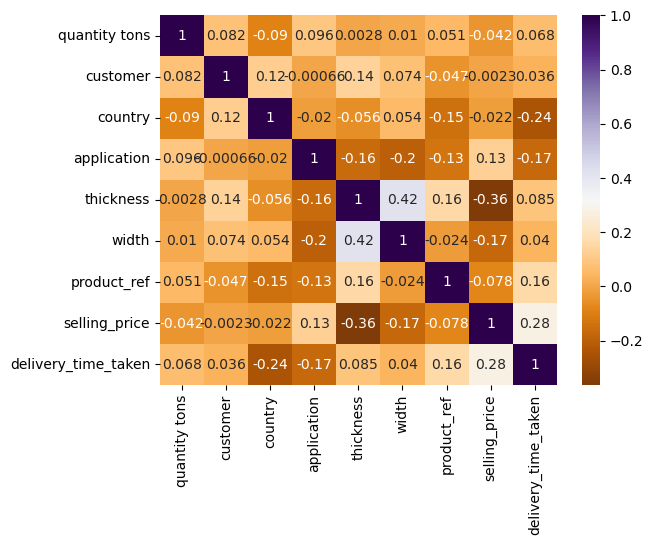

In [30]:
sns.heatmap(df[cont_col].corr(), annot=True, cmap="PuOr")

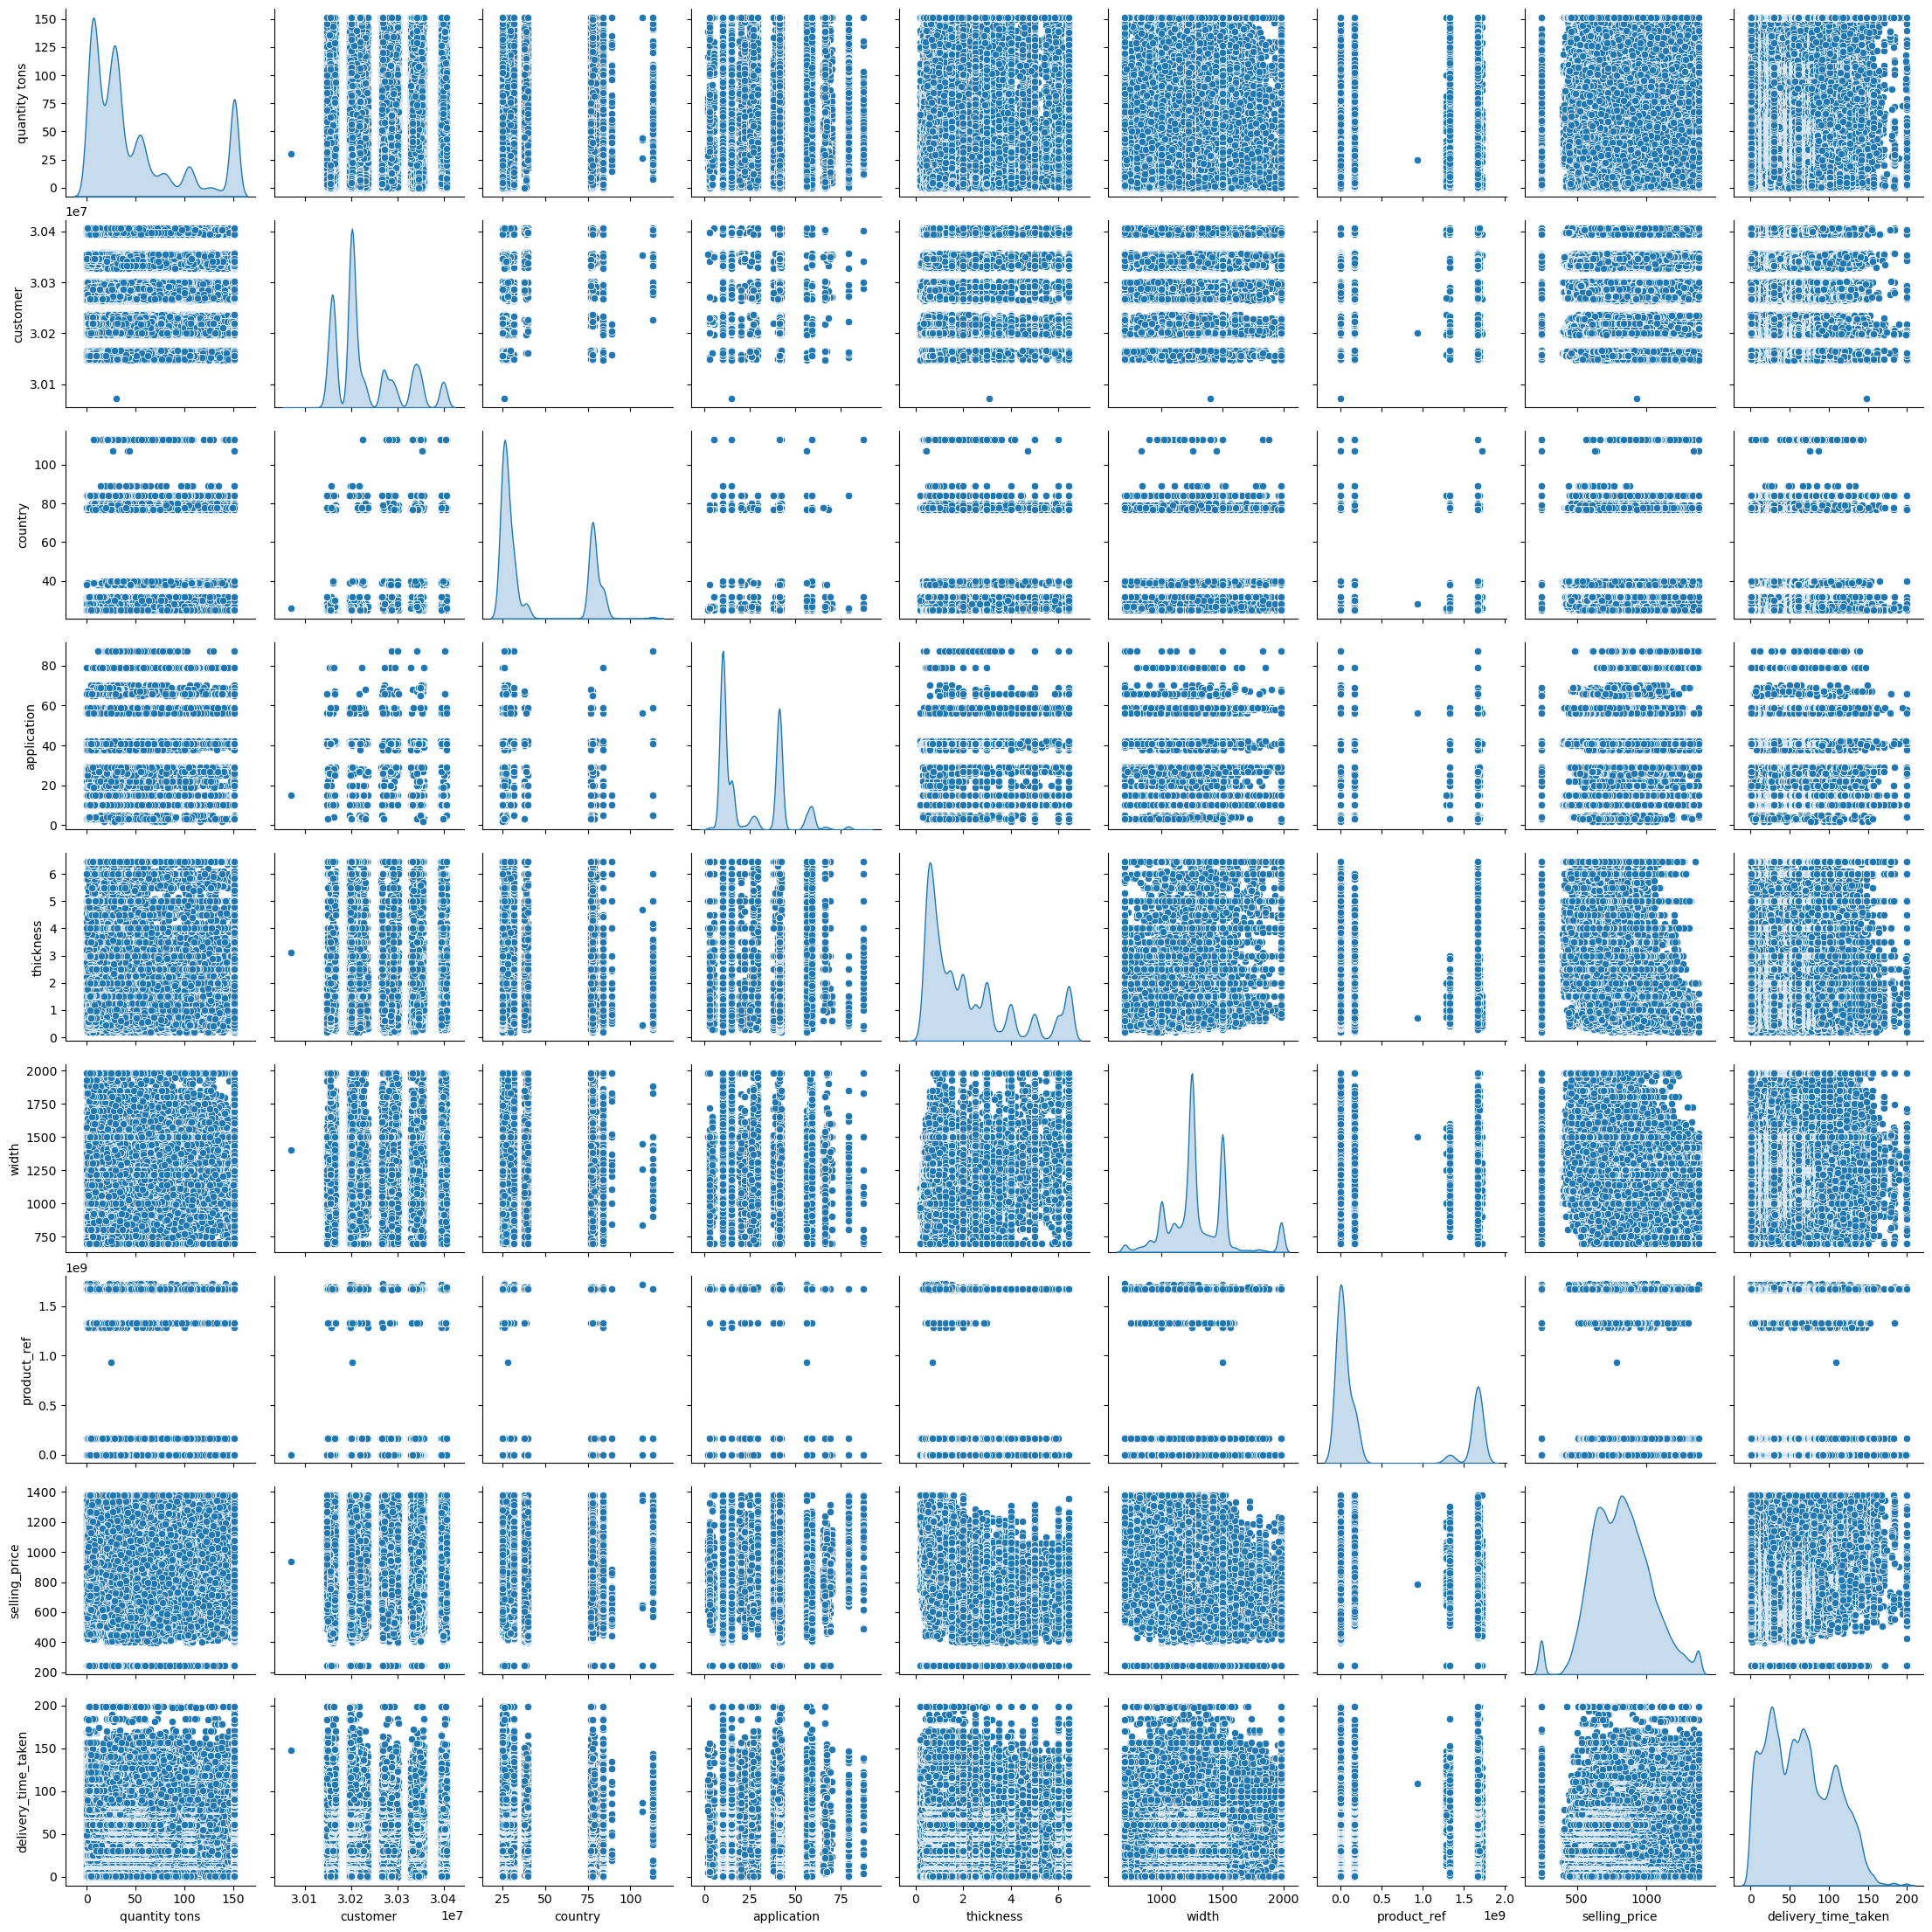

In [31]:

sns.pairplot(df,diag_kind='kde')

In [32]:
df2=df.copy()

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
df["status"]= df["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})

In [36]:
le=LabelEncoder()
le.fit(df['item type'])
df['item type']=le.transform(df['item type'])

In [37]:
import pickle

In [38]:

file_path_status = r'C:\Users\Ezhil\OneDrive\Desktop\python pro\status_mapped.pkl'
with open(file_path_status, 'wb') as file:
    pickle.dump(df['status'], file)
file_path_item = r'C:\Users\Ezhil\OneDrive\Desktop\python pro\item_type_label_encoder.pkl'
with open(file_path_item, 'wb') as file:
    pickle.dump(le, file)

split

In [39]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['selling_price']) 
y = df[ 'selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 24)

Regression

Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

dtr.score(X_test, y_test)

0.8351442085923952

In [41]:
from sklearn.model_selection import cross_val_score

for depth in [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]:
  dtr = DecisionTreeRegressor(max_depth = depth)
  dtr.fit(X_train, y_train)
  train_score = dtr.score(X_train, y_train)
  cross_val = np.mean(cross_val_score(dtr, X_train, y_train, cv = 15))
  print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

Depth - 15, TrainScore: 0.8806627383197472, Cross-ValScore: 0.8175783725018163
Depth - 16, TrainScore: 0.904297306034956, Cross-ValScore: 0.8289867709059351
Depth - 17, TrainScore: 0.9250916772716643, Cross-ValScore: 0.8365459389567093
Depth - 18, TrainScore: 0.9416685376148836, Cross-ValScore: 0.840859067602603
Depth - 19, TrainScore: 0.9552671548178985, Cross-ValScore: 0.8436043100931264
Depth - 20, TrainScore: 0.9666010787580473, Cross-ValScore: 0.8450250649746496
Depth - 21, TrainScore: 0.9755097537388938, Cross-ValScore: 0.8432216765205598
Depth - 22, TrainScore: 0.9820516085291294, Cross-ValScore: 0.8431236212959262
Depth - 23, TrainScore: 0.9870045644517519, Cross-ValScore: 0.8424271910868275
Depth - 24, TrainScore: 0.9904373856933621, Cross-ValScore: 0.8410043311560925
Depth - 25, TrainScore: 0.9929962564026655, Cross-ValScore: 0.8398763898794235
Depth - 26, TrainScore: 0.9947406784751716, Cross-ValScore: 0.8390006243107139
Depth - 27, TrainScore: 0.996163488109969, Cross-ValSc

In [42]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=20)

dtr.fit(X_train, y_train)

dtr.score(X_test, y_test)

0.8412907665735985

Random Forest Regessor

In [43]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor()

rfreg.fit(X_train, y_train)

rfreg.score(X_test, y_test)

0.9115644226605785

In [44]:
import pickle

file_ran_for_reg = r'C:\Users\Ezhil\OneDrive\Desktop\python pro\random_forest_regressor.pkl'
with open(file_ran_for_reg, 'wb') as file:
    pickle.dump(rfreg, file)

XGB Regressor

In [45]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
xgbr.score(X_test, y_test)

0.8302520877741946

In [46]:
from xgboost import XGBRegressor

for lamb in [0,0.5,1,1.5]:
  xgbr = XGBRegressor(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(xgbr, X_train, y_train, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0, Cross-Val Score: -8.839586908913067e-05
Lambda: 0.5, Cross-Val Score: 0.8492625955875323
Lambda: 1, Cross-Val Score: 0.8380608160149461
Lambda: 1.5, Cross-Val Score: 0.7750215219056195


In [47]:
from xgboost import XGBRegressor

for lamb in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
  xgbr = XGBRegressor(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(xgbr, X_train, y_train, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0.1, Cross-Val Score: 0.776425656512352
Lambda: 0.2, Cross-Val Score: 0.8106219876523649
Lambda: 0.3, Cross-Val Score: 0.8313857189474726
Lambda: 0.4, Cross-Val Score: 0.841685416651522
Lambda: 0.5, Cross-Val Score: 0.8492625955875323
Lambda: 0.6, Cross-Val Score: 0.8518042458841275
Lambda: 0.7, Cross-Val Score: 0.8522844421359798
Lambda: 0.8, Cross-Val Score: 0.8492020978983709
Lambda: 0.9, Cross-Val Score: 0.8463460886656403
Lambda: 1, Cross-Val Score: 0.8380608160149461


In [48]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(learning_rate = 0.7)
xgbr.fit(X_train, y_train)
xgbr.score(X_test, y_test)

0.8527852823149844

classification 

filtering only won (1) and (0)


In [49]:
df = df[df['status'].isin([1, 0])]

In [50]:
df.shape


(150428, 11)

imbalanced dataset

In [51]:
df['status'].value_counts()/df.shape[0]

status
1    0.771113
0    0.228887
Name: count, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
#X = df.loc[:, df.columns[1:-2]]
X = df.drop(columns=['status']) 
y = df.loc[:, 'status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 24)

Balancing dataset using SMOTEENN

In [53]:
from imblearn.combine import SMOTEENN

cc = SMOTEENN(random_state=7)

X_train_smoteenn, y_train_smoteenn = cc.fit_resample(X_train, y_train)

DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model = DecisionTreeClassifier()
model.fit(X_train_smoteenn, y_train_smoteenn)

f1_score(y_test, model.predict(X_test))

0.953334158547152

In [55]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

dtc = DecisionTreeClassifier(max_depth = 28)
dtc.fit(X_train_smoteenn, y_train_smoteenn)

f1_score(y_test, dtc.predict(X_test))

0.9529134889317502

RandomForestClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rfcla = RandomForestClassifier()
rfcla.fit(X_train_smoteenn, y_train_smoteenn)

f1_score(y_test, rfcla.predict(X_test))

0.9610150269350722

Save Model

In [57]:
import pickle

file_ran_for_class = r'C:\Users\Ezhil\OneDrive\Desktop\python pro\random_forest_classifier.pkl'
with open(file_ran_for_class, 'wb') as file:
    pickle.dump(rfcla, file)


XGBClassifier

In [58]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train_smoteenn, y_train_smoteenn)
f1_score(y_test, xgbc.predict(X_test))

0.9321073183020531

In [59]:
for lamb in [ 0, 0.5, 1 , 1.5]:
  model = XGBClassifier(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(model, X_train_smoteenn, y_train_smoteenn, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0, Cross-Val Score: 0.5120951001466045
Lambda: 0.5, Cross-Val Score: 0.9710765957873914
Lambda: 1, Cross-Val Score: 0.9797319178857737
Lambda: 1.5, Cross-Val Score: 0.9745578769804387


In [60]:
for lamb in [ 1 ,1.1,1.2,1.3,1.4, 1.5]:
  model = XGBClassifier(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(model, X_train_smoteenn, y_train_smoteenn, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 1, Cross-Val Score: 0.9797319178857737
Lambda: 1.1, Cross-Val Score: 0.9802684672715051
Lambda: 1.2, Cross-Val Score: 0.9789206575189638
Lambda: 1.3, Cross-Val Score: 0.9784288247301003
Lambda: 1.4, Cross-Val Score: 0.9770874406576266
Lambda: 1.5, Cross-Val Score: 0.9745578769804387


In [61]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(learning_rate = 1.1)
xgbc.fit(X_train_smoteenn, y_train_smoteenn)
f1_score(y_test, xgbc.predict(X_test))

0.950261733652737